In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
nRowRead = 1000
data = pd.read_csv('./Indian_stock_market_dataset/Indian_stock_market.csv', delimiter=',', nrows = nRowRead)
data.dataframeName = 'Indian_stock_market.csv'
nRow, nCol = data.shape

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1000 non-null   object 
 1   Open       1000 non-null   float64
 2   High       1000 non-null   float64
 3   Low        1000 non-null   float64
 4   Close      1000 non-null   float64
 5   Adj Close  1000 non-null   float64
 6   Volume     1000 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB


In [41]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,93.080360,95.466270,90.289850,92.655950,92.655950,3.301438e+05
std,37.998450,39.022658,36.897481,37.985424,37.985424,8.235784e+05
min,13.600000,14.600000,13.400000,13.900000,13.900000,0.000000e+00
25%,74.467503,76.599998,71.824999,74.549997,74.549997,5.101625e+04
50%,97.000000,100.735001,94.320000,96.300003,96.300003,1.138675e+05
75%,117.192501,119.820002,114.450001,116.887499,116.887499,2.645112e+05
max,210.910004,224.000000,204.000000,214.809998,214.809998,1.257199e+07


In [42]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [43]:
# check null values

data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot: >

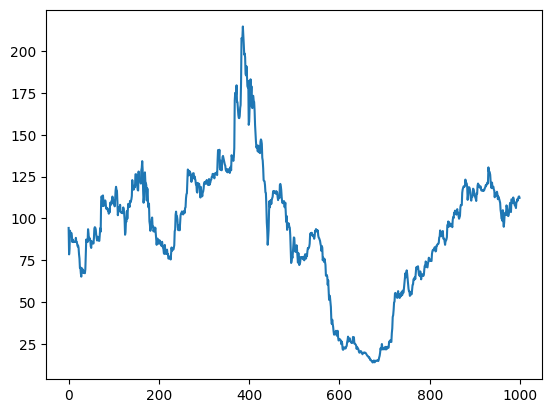

In [44]:
data['Adj Close'].plot()

In [45]:
# set Target variable
output_var = pd.DataFrame(data['Adj Close'])

# selecting the Features
features = ["Open", "High", "Low", "Volume"]

In [46]:
# Normalizing Dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(data[features])
feature_transform = pd.DataFrame(columns = features, data = feature_transform, index = data.index)
feature_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1000 non-null   float64
 1   High    1000 non-null   float64
 2   Low     1000 non-null   float64
 3   Volume  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [47]:
from sklearn.model_selection import TimeSeriesSplit
time_split = TimeSeriesSplit(n_splits = 10)

for train_index, test_index in time_split.split(feature_transform):
    x_train, x_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index) + len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index) + len(test_index))].values.ravel()
    

In [48]:
# Process the data for LSTM

trainX = np.array(x_train)
testX = np.array(x_test)
x_train = trainX.reshape(x_train.shape[0],1, x_train.shape[1])
x_test = testX.reshape(x_test.shape[0], 1, x_test.shape[1])

In [55]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils.vis_utils import plot_model

# Building LSTM Model
# for LSTM 1 input

lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences = False))
lstm.add(Dense(1))
lstm.compile(loss = "mean_squared_error", optimizer = "adam")
plot_model(lstm, show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [56]:
# Building LSTM Model
# for LSTM 2 input
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences = False))
lstm.add(Dense(1))
lstm.compile(loss = "mean_squared_error", optimizer = "adam")
plot_model(lstm, show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [57]:
history = lstm.fit(x_train, y_train, epochs = 100, batch_size = 8, verbose = 1, shuffle = False)


Epoch 1/100
114/114 [==============================] - 3s 4ms/step - loss: 9741.8564
Epoch 2/100
114/114 [==============================] - 0s 4ms/step - loss: 9657.6914
Epoch 3/100
114/114 [==============================] - 1s 4ms/step - loss: 9426.1123
Epoch 4/100
114/114 [==============================] - 0s 4ms/step - loss: 8959.6533
Epoch 5/100
114/114 [==============================] - 0s 4ms/step - loss: 8249.6377
Epoch 6/100
114/114 [==============================] - 1s 5ms/step - loss: 7357.7974
Epoch 7/100
114/114 [==============================] - 0s 4ms/step - loss: 6368.5859
Epoch 8/100
114/114 [==============================] - 0s 4ms/step - loss: 5358.8252
Epoch 9/100
114/114 [==============================] - 0s 4ms/step - loss: 4387.6865
Epoch 10/100
114/114 [==============================] - 0s 4ms/step - loss: 3496.8223
Epoch 11/100
114/114 [==============================] - 1s 4ms/step - loss: 2712.8450
Epoch 12/100
114/114 [==============================] - 0s 4ms/

114/114 [==============================] - 0s 4ms/step - loss: 9.3128
Epoch 99/100
114/114 [==============================] - 0s 4ms/step - loss: 9.2982
Epoch 100/100
114/114 [==============================] - 0s 4ms/step - loss: 9.2842


In [58]:
# LSTM Prediction
y_pred = lstm.predict(x_test)

3/3 [==============================] - 0s 6ms/step


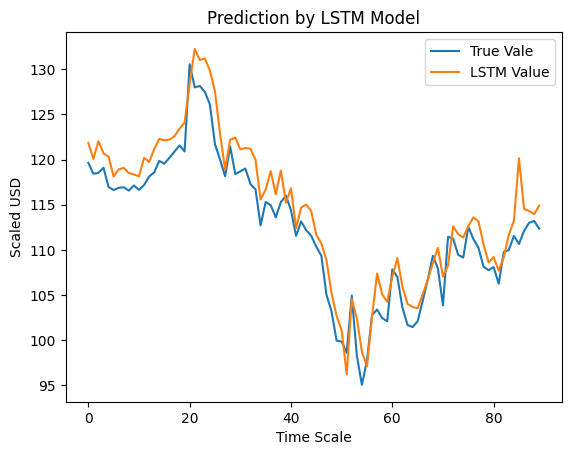

In [59]:
# Prediction vs True Adj Close Value - LSTM

plt.plot(y_test, label = "True Vale")
plt.plot(y_pred, label = "LSTM Value")
plt.title("Prediction by LSTM Model")
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()

In [61]:
from sklearn import metrics

# R2 Score
metrics.r2_score(y_test, y_pred)

0.8788618613676987

In [62]:
# R2 score is : 0.87

In [ ]:
# Thanks For Watching